Write a program to implement logistic regression. Use Breast Cancer Wisconsin (Diagnostic) Dataset



In [1]:
import pandas as pd

# Load CSV file
df = pd.read_csv("D:/B tech/Semester 5/ML/Practicals/dataset/breastcancer.csv")


# Show first 5 rows
print(df.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

Missing values before cleaning:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Missing values after cleaning:
 diagnosis             

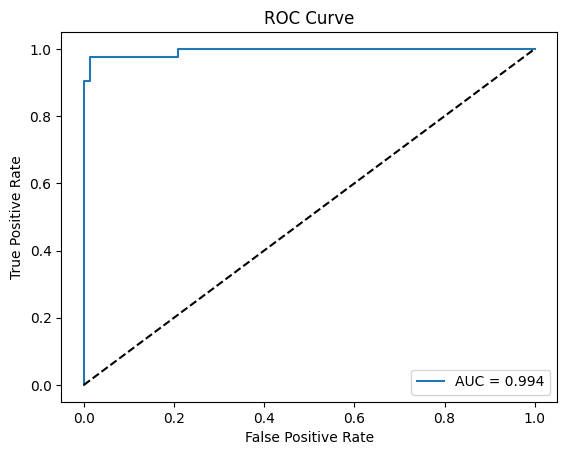

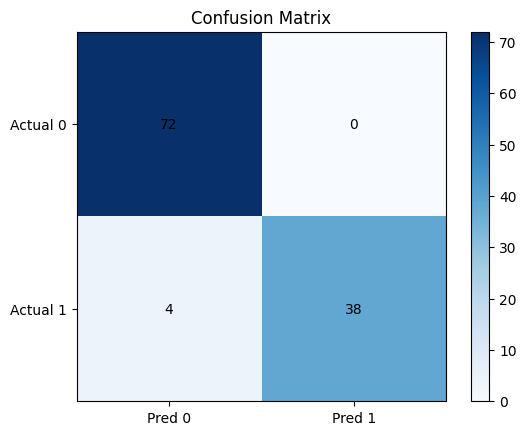

In [2]:
# ================================
# 1️⃣ Load and Clean Dataset
# ================================
import pandas as pd

df = pd.read_csv(r"D:\B tech\Semester 5\ML\Practicals\dataset\breastcancer.csv")

# Remove ID and unnamed columns
if "id" in df.columns:
    df = df.drop("id", axis=1)
if "Unnamed: 32" in df.columns:
    df = df.drop("Unnamed: 32", axis=1)

# Encode target column
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Check missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Fill missing values
df = df.fillna(df.mean(numeric_only=True))

# Verify cleaning
print("\nMissing values after cleaning:\n", df.isnull().sum())


# ================================
# 2️⃣ Split Data
# ================================
from sklearn.model_selection import train_test_split

X = df.drop("diagnosis", axis=1)
Y = df["diagnosis"]

# First: Train 60%, temp 40%
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X, Y, test_size=0.40, random_state=42, stratify=Y
)

# Second: Split temp into validation 20% + test 20%
X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.50, random_state=42, stratify=Y_temp
)

print("\nData Split:")
print("Train :", len(X_train))
print("Val   :", len(X_val))
print("Test  :", len(X_test))


# ================================
# 3️⃣ Logistic Regression Model
# ================================
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, Y_train)

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


# ================================
# 4️⃣ Evaluation Metrics
# ================================
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_curve, auc
)

acc  = accuracy_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred)
rec  = recall_score(Y_test, y_pred)
f1   = f1_score(Y_test, y_pred)
cm   = confusion_matrix(Y_test, y_pred)

print("\nMODEL PERFORMANCE:")
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall  :", rec)
print("F1 Score :", f1)

print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:\n")
print(classification_report(Y_test, y_pred))


# ================================
# 5️⃣ ROC Curve and Confusion Matrix Plot
# ================================
import matplotlib.pyplot as plt
import numpy as np

# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Confusion Matrix Heatmap
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ["Pred 0", "Pred 1"])
plt.yticks([0,1], ["Actual 0", "Actual 1"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i,j], ha="center", va="center")
plt.show()
